<a href="https://colab.research.google.com/github/Gaurav7004/deep_learning_study/blob/master/Anomaly_Detection_via_DBSCAN_20_July.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [2]:
df_1 = pd.read_csv('Age_Weight.csv')
df_1.head(3)

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4


In [3]:
df_1['Gender'] = np.where(df_1['Gender']=='Male',1,0)
df_1.head(3)

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4


In [4]:
# including all the columns

as_br_with_na = df_1[["Weight", "Height", "Gender", "Index"]]

In [5]:
# Dropped rows having null values

as_br_nona = as_br_with_na.dropna()

In [6]:
# Converted to csv (removed null values)

as_br_nona.to_csv("as_br_nona.csv")

In [47]:
# Take any number of columns

as_br = as_br_nona[["Weight", "Height", "Gender"]]

In [48]:
# Resetting the index via adding new index column

as_br1 = as_br.reset_index()
as_br1.head(3)

,index,Weight,Height,Gender
0,0,96,174,1
1,1,87,189,1
2,2,110,185,0


In [49]:
# Saved reset index dataset to csv

as_br1.to_csv("as_br1.csv")
as_br1.head()

,index,Weight,Height,Gender
0,0,96,174,1
1,1,87,189,1
2,2,110,185,0
3,3,104,195,0
4,4,61,149,1


In [50]:
# used MinMaxScaler for scaling 

scaler = StandardScaler()

In [53]:
as_br = scaler.fit_transform(as_br)
as_br = pd.DataFrame(as_br2)
as_br.head(3)

,0,1,2
0,-0.309117,0.247939,1.020204
1,-0.587322,1.164872,1.020204
2,0.123647,0.920357,-0.980196


In [54]:
# Using Silehouette analysis and Kmeans algorithm to find the ideal no. of clusters for the data

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

# range of values to find best clusters
n = int(input())
range_n_clusters = [i for i in range(3, n+1)]

for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters, random_state=0)
  cluster_labels = clusterer.fit_predict(as_br)

  # The silhouette distance gives the average score value for all samples.
  # this gives a perspectiive into density and separation of formed clusters.
  silhouette_avg = silhouette_score(as_br, cluster_labels)

  # printing silhouette_score for each value of n
  print("for n_clusters =", n_clusters,
        "average silhouette_score is :", silhouette_avg)
  
  # computing silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(as_br, cluster_labels)


10
for n_clusters = 3 average silhouette_score is : 0.3309821277462707
for n_clusters = 4 average silhouette_score is : 0.36164871933110326
for n_clusters = 5 average silhouette_score is : 0.36773357998835987
for n_clusters = 6 average silhouette_score is : 0.39103242438058705
for n_clusters = 7 average silhouette_score is : 0.38966409305591315
for n_clusters = 8 average silhouette_score is : 0.395650230737985
for n_clusters = 9 average silhouette_score is : 0.3904309322048356
for n_clusters = 10 average silhouette_score is : 0.38935075025570676


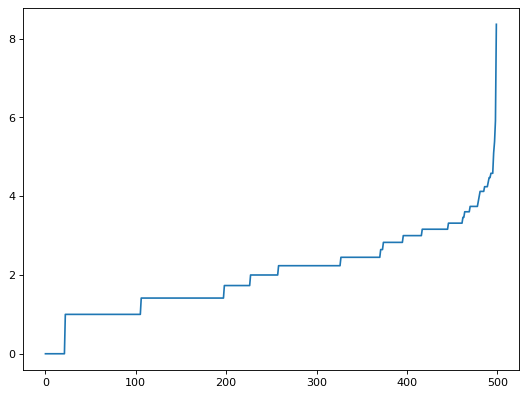

In [55]:
# The optimal value for epsilon will be found at the point of maximum curvature.

from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(df_1)
distances, indices = nbrs.kneighbors(df_1)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [57]:
# According to the above graph decided the range of epsilon values

stepsize = float(input())
start = float(input())
stop = float(input())

# variable range of epsillon
range_eps = np.arange(start, stop, stepsize)

for i in range_eps:
  print("eps value is : "+str(i))
  db = DBSCAN(eps=i, min_samples=4).fit(as_br)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  print(set(labels))
  silhouette_avg = silhouette_score(as_br, labels, metric='euclidean')
  print("eps value =" + str(i),"\n" 
        "average silhouette_score : ", silhouette_avg)
  print("\n\n")

0.1
2.5
4.2
eps value is : 2.5
{0}


ValueError: ignored

In [58]:
# To find the right number of clusters

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

# To find the ‘min_samples’ hyper parameter 

print("Enter the maximum value to which you want to check clusters : ")
n_clusters = int(input())
min_samples = [i for i in range(1, n_clusters+1)]

               
for i in min_samples:
  print("eps value is : "+str(i))
  db = DBSCAN(eps=i, min_samples=4).fit(as_br)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  print(set(labels))
  print("min_sample value =" + str(i),"\n" 
        "total no. of clusters : " + str(len(set(labels))))
  print("\n\n")

Enter the maximum value to which you want to check clusters : 
10
eps value is : 1
{0, 1}
min_sample value =1 
total no. of clusters : 2



eps value is : 2
{0, 1}
min_sample value =2 
total no. of clusters : 2



eps value is : 3
{0}
min_sample value =3 
total no. of clusters : 1



eps value is : 4
{0}
min_sample value =4 
total no. of clusters : 1



eps value is : 5
{0}
min_sample value =5 
total no. of clusters : 1



eps value is : 6
{0}
min_sample value =6 
total no. of clusters : 1



eps value is : 7
{0}
min_sample value =7 
total no. of clusters : 1



eps value is : 8
{0}
min_sample value =8 
total no. of clusters : 1



eps value is : 9
{0}
min_sample value =9 
total no. of clusters : 1



eps value is : 10
{0}
min_sample value =10 
total no. of clusters : 1





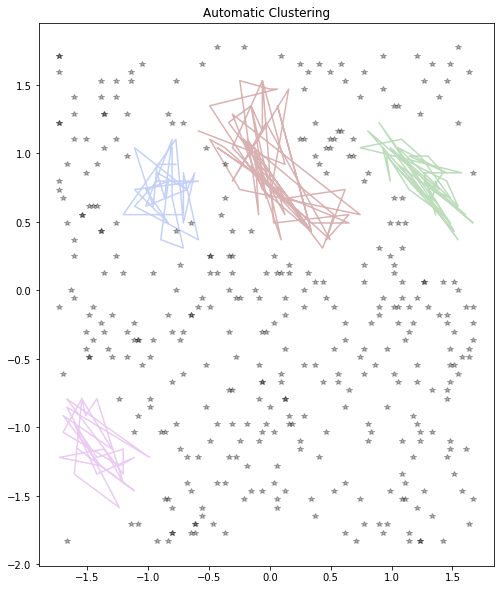

In [59]:
#Ordering points to identify the clustering structure 
#(OPTICS) is an algorithm for finding density-based clusters in spatial data

from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec

clust = OPTICS(min_samples=10, xi=0.05, min_cluster_size=0.05)
as_br = pd.DataFrame(as_br)
as_br = as_br.iloc[:, [0, 1]].values 

clust.fit(as_br)
plt.figure(figsize=(20, 16))
G = gridspec.GridSpec(2, 3)
ax2 = plt.subplot(G[1, 0])

colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']

for klass, color in zip(range(0, 5), colors):
  clusters = as_br[clust.labels_ == klass]
  ax2.plot(clusters[:, 0], clusters[:, 1], color, alpha=0.3)

ax2.plot(as_br[clust.labels_ == -1, 0], as_br[clust.labels_ == -1, 1], 'k*', alpha=0.3)
ax2.set_title('Automatic Clustering')

plt.tight_layout()
plt.show()

In [60]:
# Computing DBSCAN 

db = DBSCAN(eps=3.8, min_samples=6).fit(as_br)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print(set(labels))

n_clusters_ = len(set(labels))
n_noise = list(labels).count(-1)

print('Estimated no. of clusters: %d' % n_clusters_)
print('Estimated no. of noise points : %d' % n_noise)

{0}
Estimated no. of clusters: 1
Estimated no. of noise points : 0


In [ ]:
# Result is stored in list1

list1 = [i for i in result]

In [ ]:
my_dt  = pd.DataFrame(list1)

In [ ]:
newlist = [i for i in my_dt.values.tolist()]

In [ ]:
res1 = str(newlist)[1:-1]

res2 = str(res1)[1:-1]


In [ ]:
r_new = re.findall('\d+', res2)

In [ ]:
test_list = [int(i) for i in r_new]

In [ ]:
as_br_error = as_br1.iloc[test_list, ]

In [ ]:
df_error = as_br_error.iloc[:, 0]

In [ ]:
df_er = df_error.to_list()

In [ ]:
df_2 = pd.read_csv("as_br_nona.csv")
df_2

In [ ]:
df3 = df_2.loc[df_2['Unnamed: 0'].isin(df_er)]

In [ ]:
final_error = df3.iloc[:, 1]
final_error

In [ ]:
final_er = final_error.to_list()

In [ ]:
final = df_1.loc[df_1['Weight'].isin(final_er)]

In [ ]:
final.to_csv("final_error_data.csv")

In [ ]:
pd.read_csv('final_error_data.csv')